#                                             Milikan Oil Drop
## Justin Houle , Liam Patterson

# Abstract

# Introduction

# Data and Calculations

Sum of forces for latex sphere with...

Plates off:
\begin{equation}
mg-6\pi\eta rs=0
\end{equation}

Plates on:

Sphere moving upwards
\begin{equation}
Eq-mg=6\pi\eta rv^+
\end{equation}

Sphere moving downwards
\begin{equation}
Eq+mg=6\pi\eta rv^-
\end{equation}

Gravity eliminated by adding 2 eqs
\begin{equation}
2Eq=6\pi\eta r(v^+ - v^-)
\end{equation}

\begin{equation}
Eq=3\pi\eta r(v^+ - v^-)
\end{equation}

\begin{equation}
q=6\pi\eta r(v^+ - v^-) / E
\end{equation}

\begin{equation}
E=V/d
\end{equation}

Eq for elementary charge
\begin{equation}
e=6\pi\eta r(\Delta v)d/V
\end{equation}

In [3]:
import math
import astropy.units as u
from astropy.io import ascii
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
data = ascii.read('MillikanOildrop_jh_lp.csv', 'r')
data

Freefall time,Rise time,Fall time,vf,vr,deltav
float64,float64,float64,float64,float64,float64
9.81,2.43,1.37,2.06e-05,3.65e-05,1.59e-05
7.23,0.36,0.31,0.000138889,0.00016129,2.24e-05
9.93,1.38,0.89,3.62e-05,5.62e-05,1.99e-05
34.31,1.28,1.19,3.91e-05,4.2e-05,2.95e-06
8.9,0.57,0.43,8.77e-05,0.000116279,2.86e-05
10.22,0.84,0.54,5.95e-05,9.26e-05,3.31e-05
24.12,2.38,2.04,2.1e-05,2.45e-05,3.5e-06
5.79,0.47,0.44,0.000106383,0.000113636,7.25e-06
21.47,0.83,0.77,6.02e-05,6.49e-05,4.69e-06


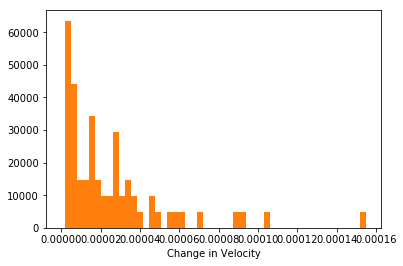

In [5]:
data = ascii.read('MillikanOildrop_jh_lp.csv', 'r')['deltav']

fit = KernelDensity(kernel='exponential', bandwidth=60).fit(data[:, np.newaxis])
x_axis = np.array(range(0, 1, 1))
pdf = fit.score_samples(x_axis[:, np.newaxis])
real = np.array([math.e**p for p in pdf])

plt.plot(x_axis, real)
plt.hist(data, bins=50, normed=True, histtype='stepfilled')
plt.title("")
plt.xlabel("Change in Velocity")
plt.show()

In [7]:
#Finding charge and % error
n=1.8e-5 #eta
r=5.5e-7
d=5e-3
V=300

data = ascii.read('MillikanOildrop_jh_lp.csv', 'r')['deltav']

a=sum(data)
b=len(data)
avg_delta_v=a/b

e=3* np.pi * n * r * avg_delta_v * (d/V)

q=1.6e-19
error = (np.abs(q-e) / q) * 100

print(avg_delta_v, 'm/s - Avg delta v')
print(e, 'C - Experimental Value for e')
print(error, '% - Percent Error')

2.54197313433e-05 m/s - Avg delta v
3.95299284159e-20 C - Experimental Value for e
75.29379474 % - Percent Error


In [29]:
expon.pdf?

Object `expon.pdf` not found.


# Conclusions

For this lab, we measured the value for elementary charge by using Millikan's Oil drop experiment, but instead with latex spheres. We attempted to measure the freefall time as well as the rise and fall times with an electric field present. We took 100 total measurements over the span of 2 lab periods, but due to some of them being faulty or incomplete this reduced the amount to 67. By using these measurements, we found the rise and fall velocities and the change in these velocities. We used the average of the change in velocities in the equation:
\begin{equation}
e=6\pi\eta r(\Delta v)d/V
\end{equation}
to find our experimental value of elementary charge. Our average value for delta v was 2.54197313433e-05 m/s. With this delta v we found the value for expierimental charge to be 3.95299284159e-20 C. This is a 75.29379474 % error from the known value of elementary charge of 1.602e-19 C.

We believe that this high percent error is due to the difficulty of measuring the spheres. The spheres we sometimes difficult to find due to them rising and falling in "3 dimensions" so they would frequently go in and our of focus which requires adjusting the microscope. Also, when turning on the electric field, the spheres would shoot up or down at very fast speeds, due to the large value of electric field. The spheres would sometimes move so fast that they would move outside of the microscope lens before we can react, so we lose track of that sphere. For the times we were able to keep track of the spheres, they would still move quickly, which made it difficult to measure the time it takes for them to travel a set distance, because they would frequently do it in fractions of a second, as you can see from our measurements. These very short time periods made it difficult to make very accurate measurements, which most likely effected our results.

# References

The 2 lab handouts